In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import numpy as np 
import pandas as pd
import seaborn as sns
import warnings
import logging
import math

import sqlalchemy as sa
from sqlalchemy.engine import URL
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D
from matplotlib import cm
import matplotlib
from matplotlib import ticker
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mtick
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import classification_report, roc_curve, accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,StratifiedKFold

from sklearn.calibration import calibration_curve
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import classification_report, roc_curve, accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning

import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
import joblib

from datetime import datetime
from time import strftime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

warnings.filterwarnings("ignore", category=DeprecationWarning)

# Setting up logging with a FileHandler
log_file_path = 'classification_log.txt'
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s', datefmt='%Y-%m-%d %H:%M:%S')

file_handler = logging.FileHandler(log_file_path)
file_handler.setLevel(logging.INFO)
file_handler.setFormatter(logging.Formatter('%(asctime)s - %(levelname)s - %(message)s'))

logger = logging.getLogger(__name__)
logger.addHandler(file_handler)

pd.DataFrame.iteritems = pd.DataFrame.items
np.set_printoptions(suppress=True,precision=20)

# suppress scientific notation by setting float_format
pd.options.display.float_format = '{:.16f}'.format
pd.set_option('float_format', '{:f}'.format)

# Suppress all warnings
warnings.filterwarnings("ignore")

#https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py
#https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use

In [2]:
# Reading the dataset
dataset_path = "/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv"

try:
    # Attempt to read the dataset
    df = pd.read_csv(dataset_path)
    logger.info(f"Dataset loaded successfully from {dataset_path}")
except FileNotFoundError:
    logger.error("Error: Dataset file not found. Please provide the correct file path.")
except Exception as e:
    logger.error(f"An error occurred: {e}")
    
df.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1


In [3]:
data_df = df[['output', 'age','sex','cp','fbs']]

df1 = data_df.copy(deep=True)
cat_cols = ['sex','fbs']

label_name = 'output'

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop([label_name],axis=1)
y = df1[['output']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 4)
The shape of X_test is        (61, 4)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


In [5]:
# Assuming y_train is your target variable
class_counts = y_train.value_counts()

# Print the counts
print("Class 0 count:", class_counts[0])
print("Class 1 count:", class_counts[1])

Class 0 count: 109
Class 1 count: 133


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#clf = DecisionTreeClassifier(max_leaf_nodes=10,max_depth=10, random_state=0)
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [7]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
            )
        )

The binary tree structure has 15 nodes and has the following tree structure:

node=0 is a split node with value=[[105. 122.]]: go to node 1 if X[:, 1] <= 0.5 else to node 8.
	node=1 is a split node with value=[[80. 30.]]: go to node 2 if X[:, 2] <= 0.5 else to node 5.
		node=2 is a split node with value=[[15. 15.]]: go to node 3 if X[:, 3] <= 0.5 else to node 4.
			node=3 is a leaf node with value=[[11. 15.]].
			node=4 is a leaf node with value=[[4. 0.]].
		node=5 is a split node with value=[[65. 15.]]: go to node 6 if X[:, 0] <= 49.0 else to node 7.
			node=6 is a leaf node with value=[[11.  6.]].
			node=7 is a leaf node with value=[[54.  9.]].
	node=8 is a split node with value=[[25. 92.]]: go to node 9 if X[:, 2] <= 0.5 else to node 12.
		node=9 is a split node with value=[[ 1. 44.]]: go to node 10 if X[:, 3] <= 0.5 else to node 11.
			node=10 is a leaf node with value=[[ 0. 38.]].
			node=11 is a leaf node with value=[[1. 6.]].
		node=12 is a split node with value=[[24. 48.]]: go

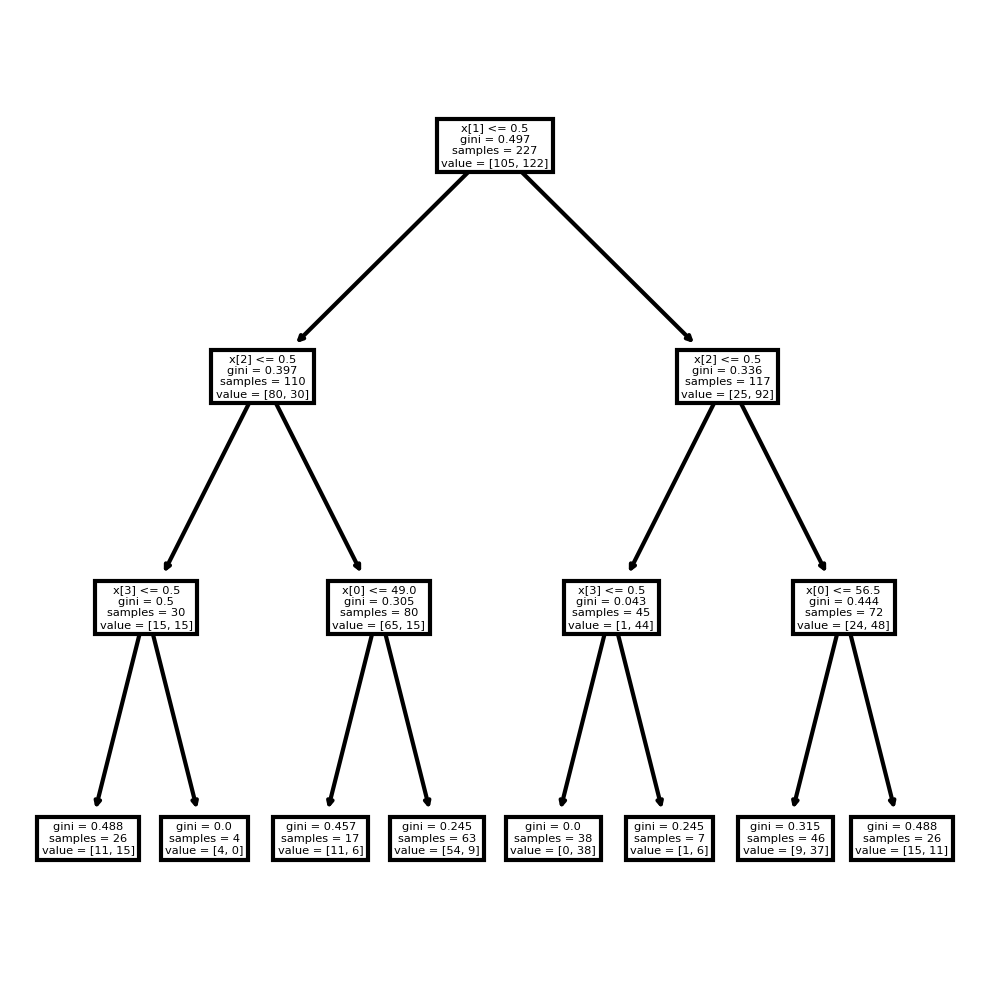

In [8]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf);
fig.savefig('plottreedefault.png')

In [9]:
score = clf.score(X_test, y_test)
print(score)

0.7368421052631579


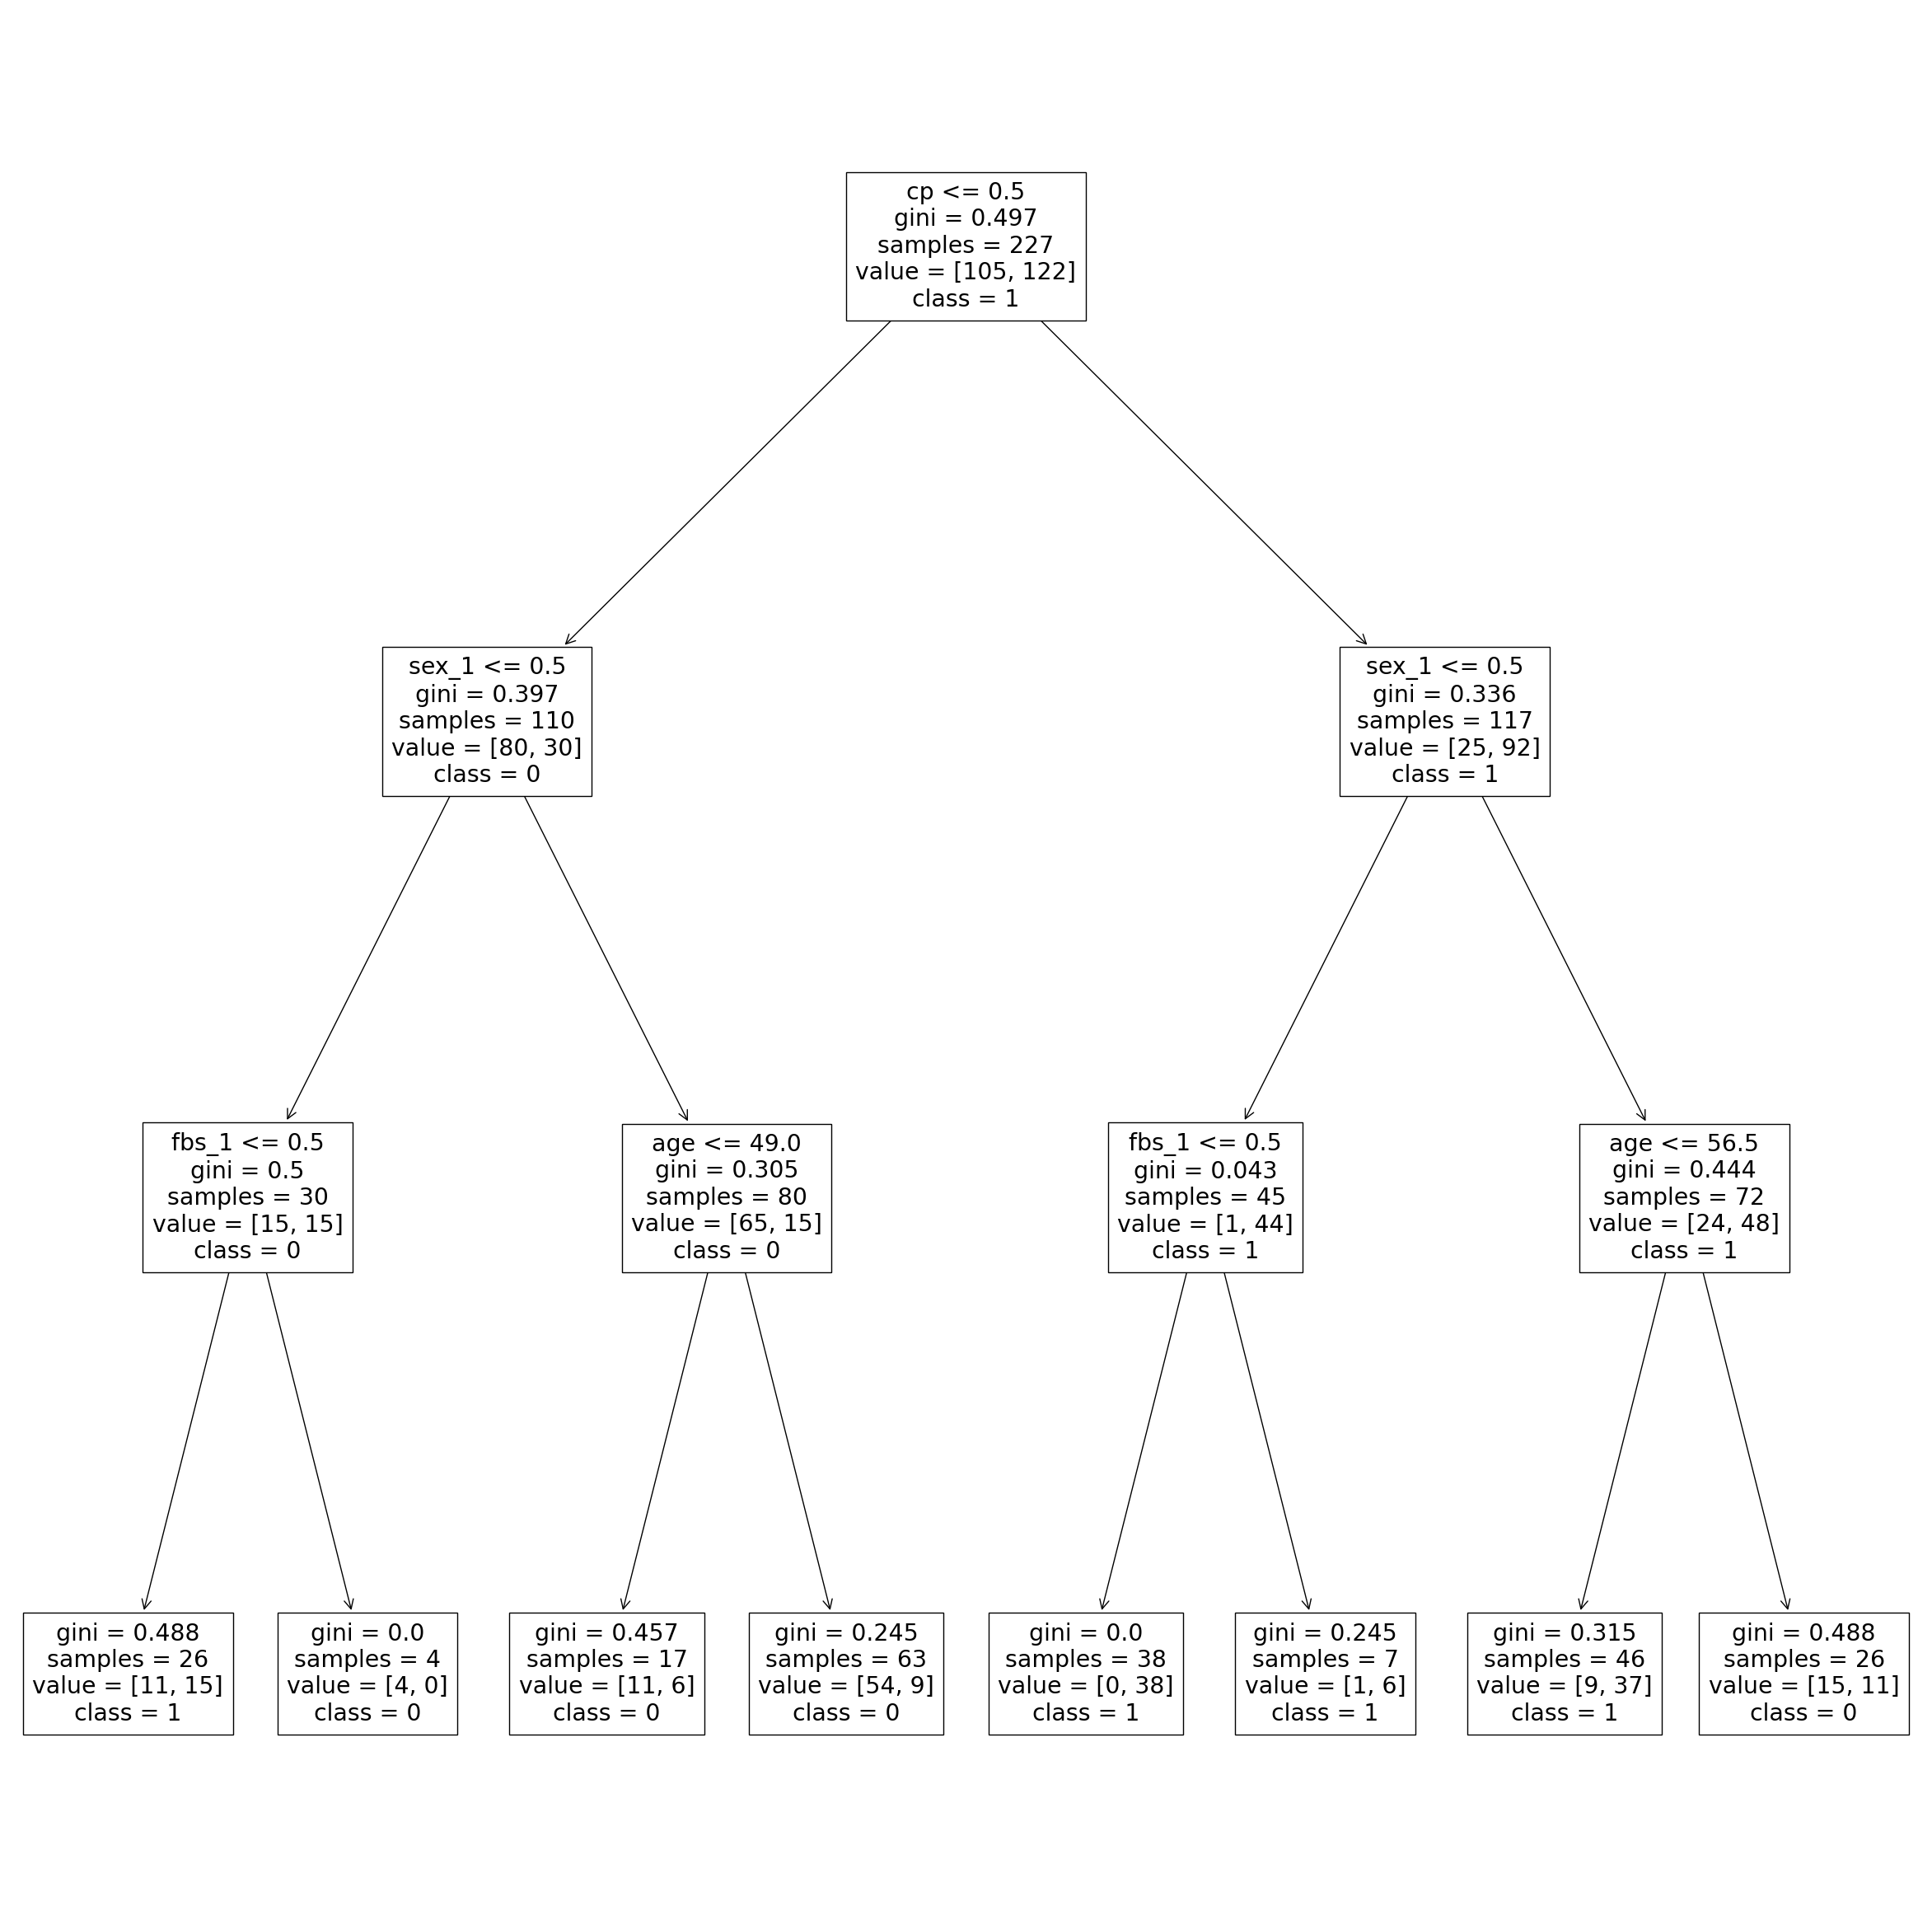

In [10]:
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(clf, 
                   feature_names=df1.drop([label_name],axis=1).columns.to_list(),  
                   class_names = (['0', '1']),
                   filled=False)